In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import re

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
def get_settings(result_filename):
    my_list = re.split(r'/|\\', result_filename)
    data = my_list[-1].split(".")[0].split("_")
    data[1] = int(data[1][1:])
    data[2] = int(data[2][1:])
    data[3] = int(data[3])
    return data


In [3]:
result_files = glob('artifacts/run_results/*.csv')

In [4]:
test = pd.read_csv(result_files[0])

In [5]:
col =['dataflow name','Neural Network Name', 'NumPEs','l1 size','on chip bandwidth', 'Activity Energy Average', 'Area', 'Average Compute Delay' , 'EDP']
df = pd.DataFrame(columns=col)
for x in result_files:
    settings = get_settings(x)
    results = pd.read_csv(x)
    results["EDP"] = results[' Activity count-based Energy (nJ)'] * results[' Runtime (Cycles)']

    new_data = [settings[0],  results['Neural Network Name'][0],  settings[1], settings[2],settings[3], results[' Activity count-based Energy (nJ)'].mean() ,  results[' Area'].sum(),results[' Runtime (Cycles)'].sum(),results['EDP'].sum()]
    # print(x,results['EDP'].sum())
    new_df = pd.DataFrame([new_data],columns = col).copy()
    df = pd.concat([df,new_df],ignore_index = True)
    

In [6]:
df.sort_values(['dataflow name', 'NumPEs','l1 size', 'on chip bandwidth'], ascending=[True, True, True, True], inplace=True)
df.reset_index(drop=True,inplace=True)
df

dataflow name         Neural Network Name NumPEs l1 size  \
0             nlr  torchvision.models.alexnet     32       8   
1             nlr  torchvision.models.alexnet     32       8   
2             nlr  torchvision.models.alexnet     32       8   
3             nlr  torchvision.models.alexnet     32       8   
4             nlr  torchvision.models.alexnet     32       8   
..            ...                         ...    ...     ...   
859            ws  torchvision.models.alexnet   8192     256   
860            ws  torchvision.models.alexnet   8192     256   
861            ws  torchvision.models.alexnet   8192     256   
862            ws  torchvision.models.alexnet   8192     256   
863            ws  torchvision.models.alexnet   8192     256   

    on chip bandwidth  Activity Energy Average          Area  \
0                  64              444355.3375  3.075010e+07   
1                 128              444355.3375  5.670919e+07   
2                 256              444355.3375  1.086274e+08   
3                 512              444355.3375  2.124636e+08   
4                1024              444355.3375  4.201364e+08   
..                ...                      ...           ...   
859               128              363877.1875  2.862876e+11   
860               256              363877.1875  2.988107e+11   
861               512              363877.1875  3.238568e+11   
862              1024              363877.1875  3.739489e+11   
863              2048              363877.1875  4.741330e+11   

    Average Compute Delay           EDP  
0                18181575  1.033053e+13  
1                18000727  1.026554e+13  
2                17917079  1.023708e+13  
3                17893272  1.023089e+13  
4                17869701  1.022480e+13  
..                    ...           ...  
859               2043090  8.009652e+11  
860               2032129  7.971029e+11  
861               2026650  7.951727e+11  
862               2023910  7.942067e+11  
863               2022540  7.937237e+11  

[864 rows x 9 columns]

In [7]:
df["l1 size"].unique()

array([8, 16, 32, 100, 128, 256], dtype=object)

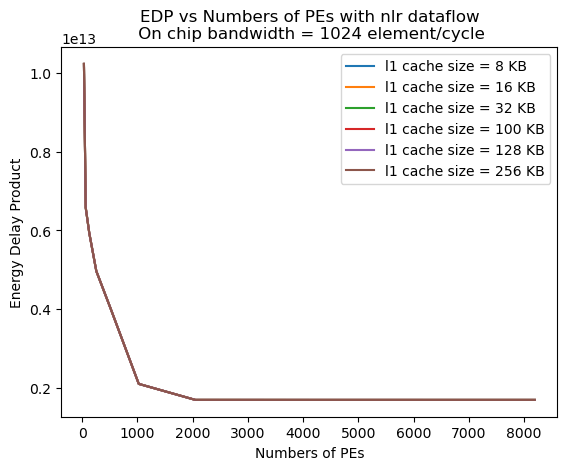

In [8]:
nlr = df[df['dataflow name'] == 'nlr']
nlr = nlr[nlr['on chip bandwidth'] == 1024]
for l1 in df["l1 size"].unique():
    nlr_plot = nlr[nlr['l1 size'] == l1]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"l1 cache size = {l1} KB")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with nlr dataflow\n On chip bandwidth = 1024 element/cycle')
plt.legend()
plt.show()

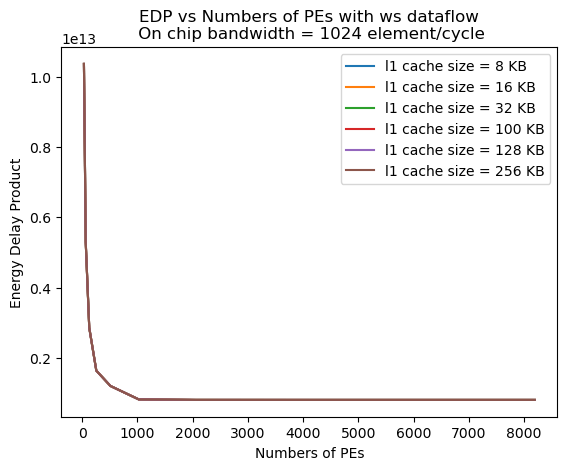

In [9]:
nlr = df[df['dataflow name'] == 'ws']
nlr = nlr[nlr['on chip bandwidth'] == 1024]
for l1 in df["l1 size"].unique():
    nlr_plot = nlr[nlr['l1 size'] == l1]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"l1 cache size = {l1} KB")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with ws dataflow\n On chip bandwidth = 1024 element/cycle')
plt.legend()
plt.show()

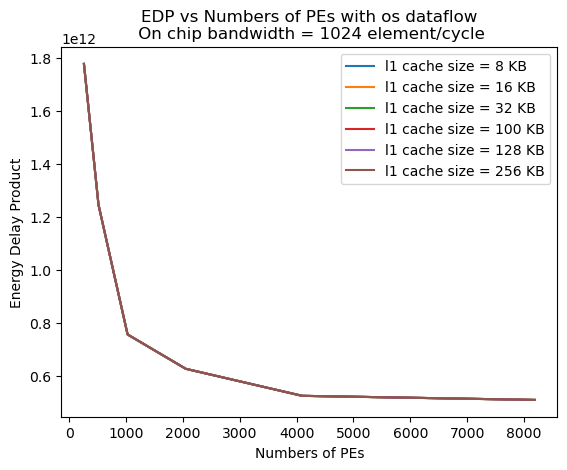

In [10]:
nlr = df[df['dataflow name'] == 'os']
nlr = nlr[nlr['on chip bandwidth'] == 1024]
for l1 in df["l1 size"].unique():
    nlr_plot = nlr[nlr['l1 size'] == l1]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"l1 cache size = {l1} KB")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with os dataflow\n On chip bandwidth = 1024 element/cycle')
plt.legend()
plt.show()

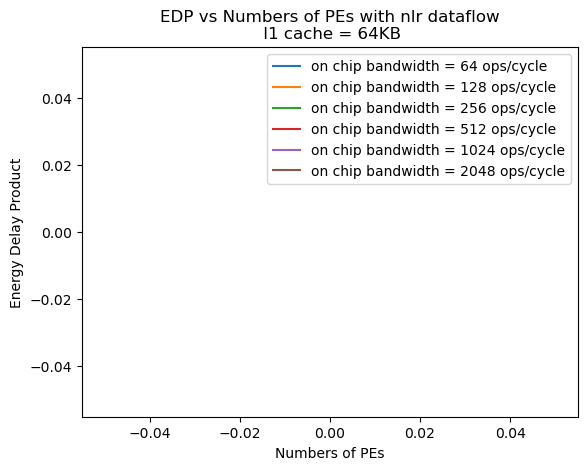

In [11]:
nlr = df[df['dataflow name'] == 'nlr']
nlr = nlr[nlr['on chip bandwidth'] == 100]
for l2 in df['on chip bandwidth'].unique():
    nlr_plot = nlr[nlr['on chip bandwidth'] == l2]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"on chip bandwidth = {l2} ops/cycle")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with nlr dataflow\n l1 cache = 64KB')
plt.legend()
plt.show()

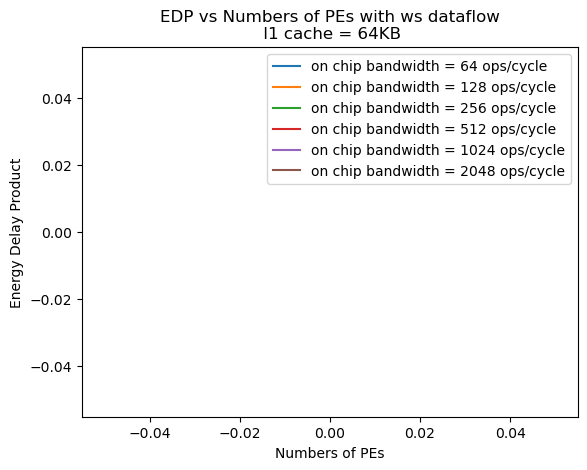

In [12]:
nlr = df[df['dataflow name'] == 'ws']
nlr = nlr[nlr['on chip bandwidth'] == 100]
for l2 in df['on chip bandwidth'].unique():
    nlr_plot = nlr[nlr['on chip bandwidth'] == l2]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"on chip bandwidth = {l2} ops/cycle")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with ws dataflow\n l1 cache = 64KB')
plt.legend()
plt.show()

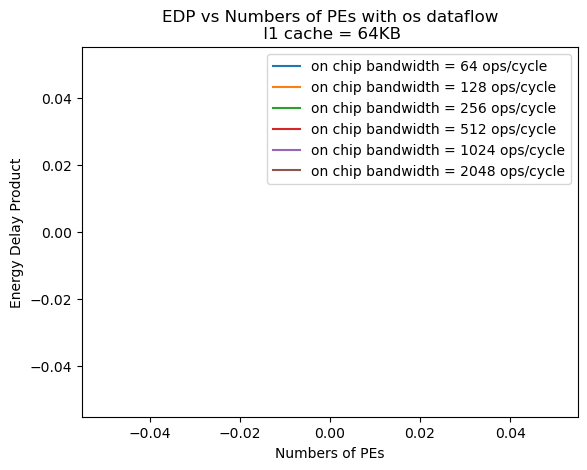

In [13]:
nlr = df[df['dataflow name'] == 'os']
nlr = nlr[nlr['on chip bandwidth'] == 100]
for l2 in df['on chip bandwidth'].unique():
    nlr_plot = nlr[nlr['on chip bandwidth'] == l2]
    plt.plot(nlr_plot['NumPEs'],nlr_plot['EDP'],label=f"on chip bandwidth = {l2} ops/cycle")

plt.xlabel('Numbers of PEs')
# Set the y axis label of the current axis.
plt.ylabel('Energy Delay Product')
plt.title('EDP vs Numbers of PEs with os dataflow\n l1 cache = 64KB')
plt.legend()
plt.show()